In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train = y_train.flatten()

In [9]:
y_train.shape

(50000,)

In [10]:
y_test = y_test.flatten()
y_test.shape

(10000,)

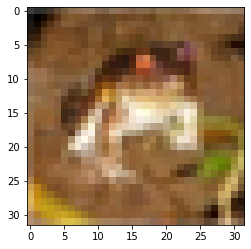

In [11]:
plt.imshow(x_train[0], cmap='gray');

In [12]:
y_train[0]

6

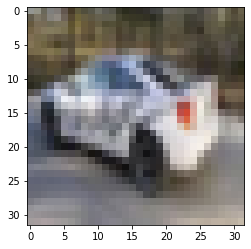

In [13]:
plt.imshow(x_train[980], cmap='gray');

In [14]:
y_train[980]

1

In [15]:
x_train, x_test = x_train/255.0, x_test/255.0

In [16]:
# Number of classes

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [17]:
x_train[0].shape

(32, 32, 3)

In [18]:
# Build the model

i = Input(shape= x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 55s 35ms/step - loss: 1.7832 - accuracy: 0.3410 - val_loss: 1.3285 - val_accuracy: 0.5258
Epoch 2/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3044 - accuracy: 0.5249 - val_loss: 1.1167 - val_accuracy: 0.6042
Epoch 3/100
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1408 - accuracy: 0.5920 - val_loss: 1.0668 - val_accuracy: 0.6150
Epoch 4/100
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0487 - accuracy: 0.6279 - val_loss: 0.9717 - val_accuracy: 0.6601
Epoch 5/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9808 - accuracy: 0.6527 - val_loss: 0.9322 - val_accuracy: 0.6721
Epoch 6/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9298 - accuracy: 0.6694 - val_loss: 0.8926 - val_accuracy: 0.6806
Epoch 7/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8793 - accuracy: 0.6850 - val_loss: 0

In [ ]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [ ]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [ ]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));